## King county house price prediction


### Data source:
https://www.kaggle.com/harlfoxem/housesalesprediction/code
### Tasks:
1. Finding significant features in housing sales
2. Predicting housing prices according to selected and engineered features

### Pipeline
1. EDA & Data Cleaning
2. Data Preprocessing
    - Feature Engineering
    - Feature Representation
        - Standardization
        - Encoding
    - Train/Test/Validation split
2. Model Selection
3. Model Building
   - Model Training
   - Parameter Tuning
4. Model Evaluation
5. Model Interpretation 
   - Error Analysis
   - Feature Importance
   - Under-fitting vs over-fitting

### Variables:
- Target:
<font color='red'>House sales price</font>

- Available variables:

1. **Time Variables**

&emsp;&nbsp;<font color='blue'>date</font>  - Date of the home sale

&emsp;&nbsp;<font color='blue'>yr_built</font> - The year the house was initially built

&emsp;&nbsp;<font color='blue'>yr_renovated</font> - The year of the house’s last renovation, 0 means no renovation

2. **Geographical Variables**

&emsp;&nbsp;<font color='blue'>lat</font> - Lattitude

&emsp;&nbsp;<font color='blue'>long</font> - Longitude


3. **Categorical Variables**

&emsp;&nbsp;<font color='blue'>zipcode</font> - What zipcode area the house is in

&emsp;&nbsp;<font color='blue'>grade</font> - An index from 1 to 13, where 1-3 falls short of building
construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

&emsp;&nbsp;<font color='blue'>waterfront</font>  - A dummy variable for whether the apartment was overlooking the waterfront or not

&emsp;&nbsp;<font color='blue'>id</font>  - Unique ID for each home sold (will not be used)



2. **Numerical Variables**

&emsp;&nbsp;<font color='blue'>bedrooms</font>  - Number of bedrooms

&emsp;&nbsp;<font color='blue'>bathrooms</font>  - Number of bathrooms, where 0.5 accounts for a room with a toilet but no shower

&emsp;&nbsp;<font color='blue'>sqft_living</font>  - Square footage of the apartments interior living space

&emsp;&nbsp;<font color='blue'>sqft_lot</font>  - Square footage of the land space

&emsp;&nbsp;<font color='blue'>sqft_above</font> - The square footage of the interior housing space that is above ground level

&emsp;&nbsp;<font color='blue'>sqft_basement</font> - The square footage of the interior housing space that is below ground level

&emsp;&nbsp;<font color='blue'>sqft_living15</font> - The square footage of interior housing living space for the nearest 15 neighbors

&emsp;&nbsp;<font color='blue'>sqft_lot15</font> - The square footage of the land lots of the nearest 15 neighbors

&emsp;&nbsp;<font color='blue'>floors</font>  - Number of floors

&emsp;&nbsp;<font color='blue'>view</font> - An index from 0 to 4 of how good the view of the property was

&emsp;&nbsp;<font color='blue'>condition</font> - An index from 1 to 5 on the condition of the apartment


### Imports

In [21]:
# Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Model Training
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate

import warnings
warnings.filterwarnings('ignore')

### Load data

In [22]:
house = pd.read_csv('kc_house_data.csv')
house = house.drop(columns=["id"])
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
house.info()
"No missing values"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

'No missing values'

### Data Preprocessing

In this section, we focus on making the data ready to use for ML models. It includes:
- EDA & feature engineering
- Building pipeline (feature representation)
- Split

##### EDA & Feature engineer

- house age:

Text(0.5, 1.0, 'house prices vs house_age')

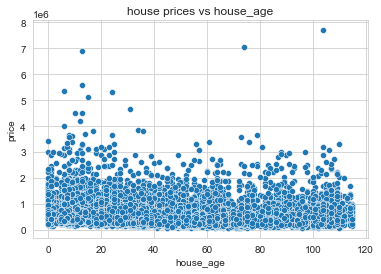

In [24]:
house["house_age"] = house.date.str[:4].astype(int) - house.yr_built
house.loc[house.house_age<0, ["house_age"]] = 0
sns.scatterplot(y=house["price"],x = house['house_age'])
plt.title("house prices vs house_age")

Text(0.5, 1.0, 'house prices increase with sqft_living')

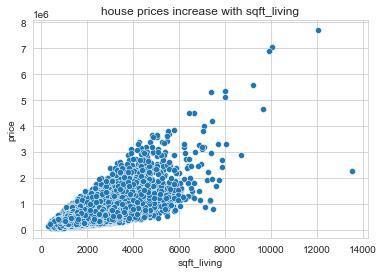

In [25]:
sns.scatterplot(y=house["price"],x = house['sqft_living'])
plt.title("house prices increase with sqft_living")

- renovation status:
    - 1 had been renovated in recent 10 years
    - 0 had not been renovated in recent 10 years

In [26]:
house["renovated"] = house.apply(lambda row: 1 if int(row.date[:4]) - row.yr_renovated <=10 else 0, axis=1)

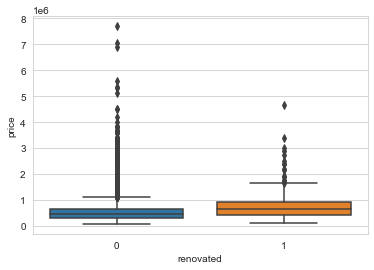

In [27]:
sns.boxplot(y=house["price"],x = house['renovated'])
plt.show()

- region average pricing level

In [28]:
print("There are {} areas in total".format(house.zipcode.nunique()))

There are 70 areas in total


<AxesSubplot:xlabel='zipcode'>

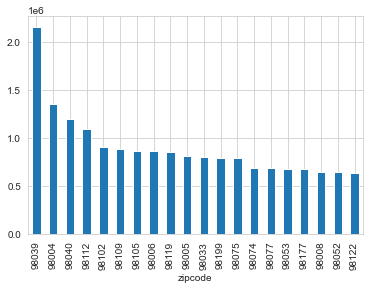

In [29]:
house.groupby("zipcode")['price'].mean().sort_values(ascending=False)[:20].plot.bar()

- grade

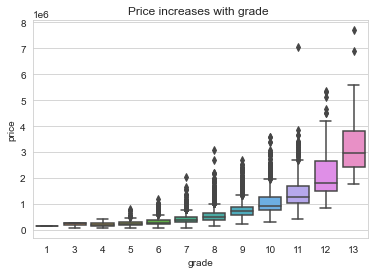

In [30]:
sns.boxplot(y=house["price"],x = house['grade'])
plt.title("Price increases with grade ")
plt.show()

- Bathroom

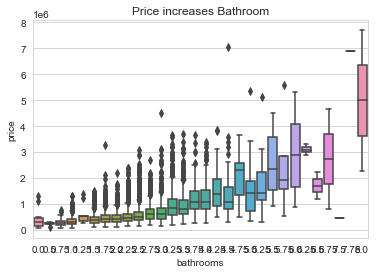

In [31]:
sns.boxplot(y=house["price"],x = house['bathrooms'])
plt.title("Price increases Bathroom")
plt.show()

In [32]:
# drop outliers and redundant fields
house.drop(house[(house.bedrooms==33)].index, inplace=True) 
house.reset_index(drop=True, inplace=True)
house.drop(columns=["date", "yr_built", "yr_renovated", "lat","long"], inplace=True)

In [33]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'house_age',
       'renovated'],
      dtype='object')

In [34]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,63,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,28,0


#### Building pipeline

##### Scaling and Encoding

In [35]:
categorical_cols = ["renovated", "waterfront","zipcode"]
numeric_cols = [i for i in house.columns if i not in categorical_cols and i != "price"]
# one hot encoder and scaler
transformer = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ('standard_scaler', StandardScaler(), numeric_cols)])

##### Split data

In [36]:
y = house["price"]
X = house.drop(["price"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
# Display Pipeline
from sklearn import set_config
set_config(display="diagram")

### Model Selection with 5-fold cross validation

- Ridge regression

In [39]:
rg = Pipeline(
    steps=[("transformer", transformer),
    ("Ridge regression", Ridge())])
rg.fit(X_train, y_train)
s1 = cross_val_score(estimator = rg,
                               X = X_train, y = y_train, cv = 5)
print("The socre of Ridge regression is: {}%".format(round(s1.mean()*100,2)))

The socre of Ridge regression is: 80.69%


- Random forest regression

In [40]:
rf = Pipeline(
        steps=[("transformer", transformer),
        ("Random forest regression", RandomForestRegressor())])  
rf.fit(X_train, y_train)
s2 = cross_val_score(estimator = rf,
                               X = X_train, y = y_train, cv = 5)
print("The socre of Random forest regression is: {}%".format(round(s2.mean()*100,2)))

The socre of Random forest regression is: 81.79%


#### Train XGBoost Regression Model

In [47]:
xgb = Pipeline(
        steps=[("transformer", transformer),
        ("xgb", XGBRegressor())])
xgb.fit(X_train, y_train)
s = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 5)
print("The socre of XGBoost Regression is: {}%".format(round(s.mean()*100,2)))        

The socre of XGBoost Regression is: 84.44%


#### Hyper-parameter tuning on XGBoost model

In [43]:
xgb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'xgb', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__one-hot-encoder', 'transformer__standard_scaler', 'transformer__one-hot-encoder__categories', 'transformer__one-hot-encoder__drop', 'transformer__one-hot-encoder__dtype', 'transformer__one-hot-encoder__handle_unknown', 'transformer__one-hot-encoder__sparse', 'transformer__standard_scaler__copy', 'transformer__standard_scaler__with_mean', 'transformer__standard_scaler__with_std', 'xgb__objective', 'xgb__base_score', 'xgb__booster', 'xgb__colsample_bylevel', 'xgb__colsample_bynode', 'xgb__colsample_bytree', 'xgb__enable_categorical', 'xgb__gamma', 'xgb__gpu_id', 'xgb__importance_type', 'xgb__interaction_constraints', 'xgb__learning_rate', 'xgb__max_delta_step', 'xgb__max_depth', 'xgb__min_child_weight',

In [44]:
# Gridsearch 
space = dict()
space['xgb__learning_rate'] = [0.01,0.1,0.2,0.3] # Makes the model more robust by shrinking the weights on each step
space['xgb__min_child_weight'] = [1,3,7] # Defines the minimum sum of weights of all observations Used to control over-fitting
space['xgb__max_depth'] = [5,6,8] # Used to control over-fitting
space['xgb__reg_lambda'] = [1,2] # handle the regularization, is explored to reduce overfitting.
space['xgb__gamma'] = [0,0.2] # Makes the algorithm conservative
search = GridSearchCV(xgb, space, scoring='r2', cv=5)
result = search.fit(X_train, y_train)
print('Best Score: {}%'.format(round(result.best_score_*100,2)))
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 85.8%
Best Hyperparameters: {'xgb__gamma': 0, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 5, 'xgb__min_child_weight': 3, 'xgb__reg_lambda': 2}


### Train model with the best hyperparameters

In [48]:
xgb = Pipeline(
        steps=[("transformer", transformer),
        ("xgb", XGBRegressor(gamma=0, learning_rate= 0.3, max_depth=5, min_child_weight=3, reg_lambda = 2))])
xgb.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['renovated', 'waterfront',
                                                   'zipcode']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'house_age']...
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.3,
                              max_delta_step=0, max_depth=5, min_child_weight=3,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=8, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=2, scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

### Model  Evaluation on Test Data

In [49]:
y_pred = xgb.predict(X_test)

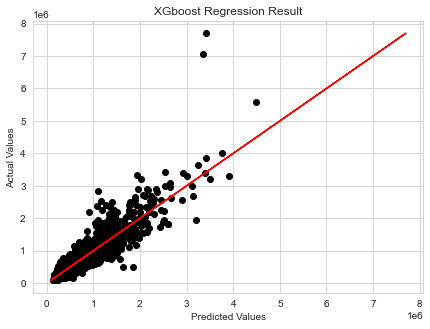

In [50]:
fig, ax1 = plt.subplots(figsize=(7,5))
plt.scatter(y_pred,y_test,color='black')
plt.plot(y_test,y_test,color='red')
plt.title('XGboost Regression Result')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### Finding: the model doesn't perform good when price is around 3,000,000

In [51]:
#Cross-Validation
scoring = {'MSE' : make_scorer(mean_squared_error),
          'MAE' : make_scorer(mean_absolute_error),
           'R2' : make_scorer(r2_score)
          }
kfold = KFold(n_splits=5, random_state=42, shuffle = True)
scores = cross_validate(estimator=xgb, X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)
rmse = np.sqrt(scores['test_MSE'])
mae = (scores['test_MAE'])
r2 = (scores['test_R2'])
print('mean_RMSE : ', "%.2f" % (rmse.mean()))
print('mean_MAE : ', "%.2f" % (mae.mean()))
print('mean_R2 : ', "%.2f" % (r2.mean()*100),"%")

mean_RMSE :  133716.02
mean_MAE :  76550.22
mean_R2 :  86.71 %


### Model Interpretation 

#### Error Analysis: Check the highest prices

In [52]:
df = X_test
df["y_test"] = y_test
df["y_pred"] = np.round(y_pred,0)
df[(df.y_pred>=3000000) & (df.y_test >= 5000000)]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,house_age,renovated,y_test,y_pred
4411,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,98039,3560,24345,13,0,5570000.0,4495906.0
7252,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,98102,3940,8800,104,0,7700000.0,3408006.0
3914,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,98004,3930,25449,74,0,7062500.0,3352108.0


In [54]:
df[(df.y_test >= 3000000)]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,house_age,renovated,y_test,y_pred
18476,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,98112,4210,8325,110,0,3300000.0,3908672.0
7989,3,4.50,5230,17826,2.0,1,4,3,10,3740,1490,98040,3670,17826,9,0,3400000.0,3386186.0
5880,5,5.00,5450,20412,2.0,0,0,3,11,5450,0,98039,3160,17825,0,0,3418800.0,2532820.0
16968,5,5.25,5090,23669,2.0,0,0,3,12,5090,0,98004,3830,22605,8,0,3100000.0,2636748.0
14083,5,4.75,6200,13873,2.0,1,4,4,11,4440,1760,98008,2940,13525,25,0,3300000.0,3014730.0
21529,4,3.75,5090,14823,1.0,0,0,3,11,4180,910,98004,3030,12752,2,0,3000000.0,2534004.0
20459,5,3.75,5350,15360,1.0,0,1,3,11,3040,2310,98004,3740,15940,7,0,3345000.0,1936278.0
4411,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,98039,3560,24345,13,0,5570000.0,4495906.0
2085,4,4.25,5770,21300,2.0,1,4,4,11,5770,0,98040,4620,22748,34,0,3850000.0,3417594.0
15255,4,3.25,4830,22257,2.0,1,4,4,11,4830,0,98039,3820,25582,24,0,3640900.0,3252409.0


##### conclusions: There are some hidden factors that are not covered in feature space.

#### Feature Importance

In [55]:
ct = xgb.named_steps['transformer']
tx = ct.get_params()['transformers']
feature_names = []
for name,transformer,features in tx:
    try:
        Var = ct.named_transformers_[name].get_feature_names().tolist()
    except AttributeError:
        Var = features
    feature_names = feature_names + Var

features = {i: name for i,name in enumerate(feature_names)}

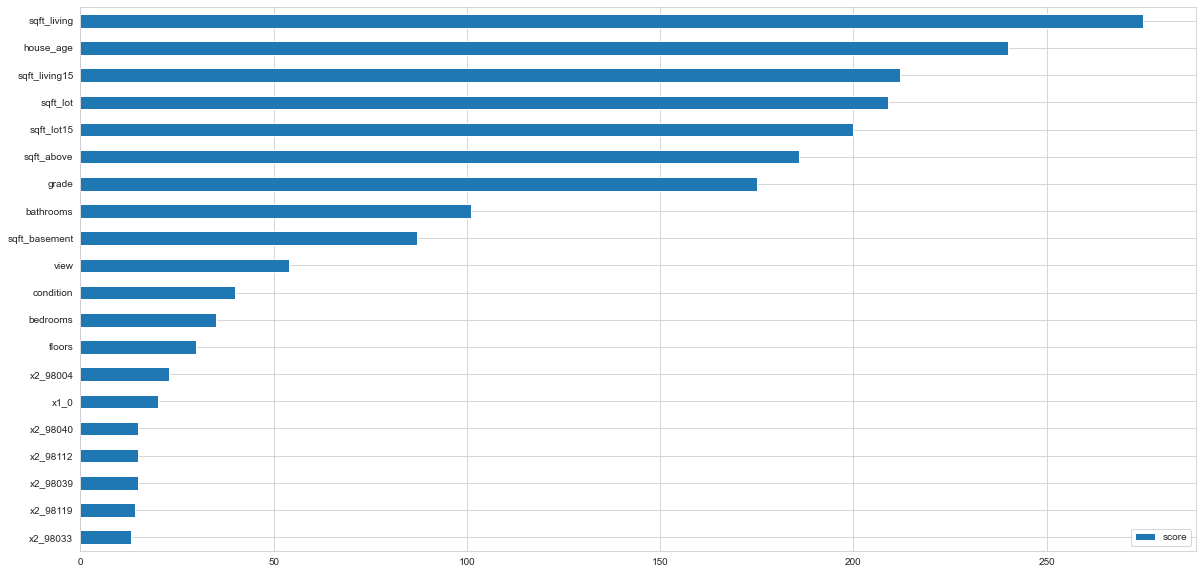

In [56]:
model = xgb.named_steps["xgb"]
model.get_booster().feature_names

feature_important = model.get_booster().get_score(importance_type='weight')

index_lst = [int(k.strip('f')) for k in feature_important.keys()] 
keys = [features[i] for i in index_lst]
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh',  figsize = (20,10)).invert_yaxis() ## plot top 20 features

## Conclusion

In this task, we build an Extreme Griant Boost regressor for King county house price dataset.<br> 
- **Data preprocessing**: First, I cleaned the data, and then did feature engineering, parsing column age and column renovation status, and then explored finished dataset. Second, I splited data into 30% testing data and 70% training data. Last, I encoded categorical features and scaled numerical features in the pipeline.<br> 
- **Model selection and parameter tuning**: I compared Ridge, randomforest regression, polynomial regression, and XGBoost regression with 5-fold cross validation and then picked XGBoost, which has the highest R2 score. Then I trained model with gridsearch, finding the best parameter combination. And then fit model with this set of paramters.
- **Model evaluation**: I predicted y with pre-trained model and generated a scatter plot showing the relationship between predicted target and actual target, and then I computed a list of evaluation scores( rmse, mse, R2). <br>
- **Error analysis**: I did error analysis by explaining samples where the model make errors.<br>
- **Model Interpretation**: I checked feature importance.<br>
- **Model Improvement**: I dropped outliers and categorized locations by zip code.(Location is very important to house price.)

#### Data source:
https://www.kaggle.com/harlfoxem/housesalesprediction/code
#### Reference:
https://xgboost.readthedocs.io/en/stable/parameter.html<br>
https://machinelearningmastery.com/xgboost-for-regression/<br>
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/


